In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataframe=pd.read_csv("Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [7]:
def handleRate(value):
    value=str(value).split("/")
    value=value[0]
    return float (value)

dataframe["rate"]=dataframe["rate"].apply(handleRate)
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


Text(0.5, 0, 'Types of restaurants')

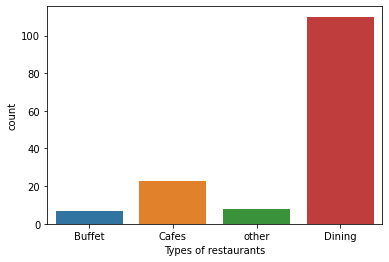

In [9]:
sns.countplot(dataframe['listed_in(type)'])
plt.xlabel("Types of restaurants")

In [10]:
x=dataframe['votes']
y=dataframe['listed_in(type)']

Text(0, 0.5, 'Types of restaurant')

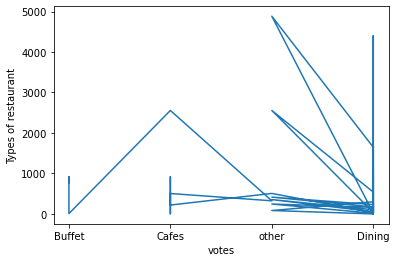

In [12]:
plt.plot(y,x)
plt.xlabel("votes")
plt.ylabel("Types of restaurant")

In [14]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

Text(0, 0.5, 'Types of restaurant')

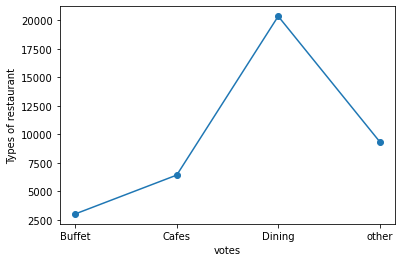

In [17]:
plt.plot(grouped_data,marker='o')
plt.xlabel("votes")
plt.ylabel("Types of restaurant")

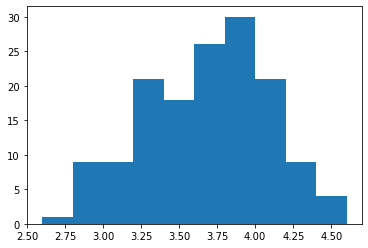

In [19]:
plt.hist(dataframe['rate'])
plt.show()

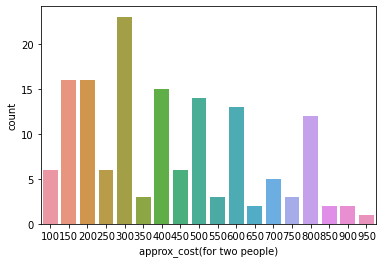

In [22]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(couple_data)

In [24]:
grouped_data=dataframe.groupby('online_order')['rate'].sum()
grouped_data

online_order
No     313.9
Yes    223.8
Name: rate, dtype: float64

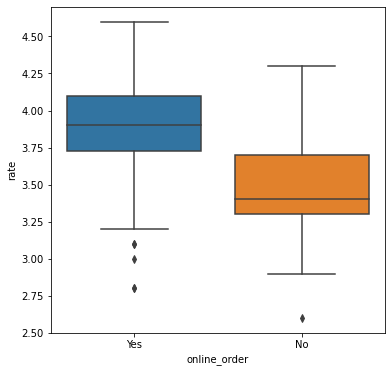

In [34]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',data=dataframe)

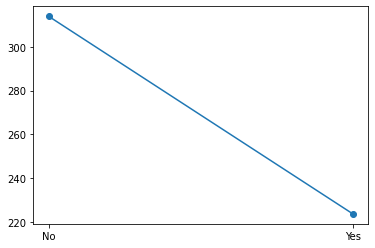

In [35]:
plt.plot(grouped_data,marker='o')

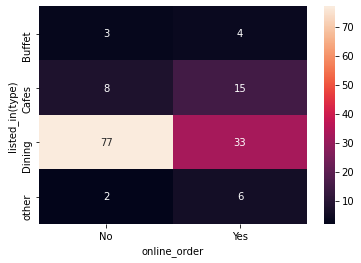

In [39]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True)